Instalar os pacotes

In [5]:
#para manipulaçao de dados
import pandas as pd
import numpy as np

# para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

Leitura e análise exploratória dos dados

In [7]:
#leitura dos dados em csv
df = pd.read_csv("estoque.csv", sep = ";")

In [8]:
#verificando as 5 primeiras linhas
df.head(5)

,id_loja,estoque,data
0,1,167,02/01/23
1,1,160,03/01/23
2,1,184,04/01/23
3,1,164,05/01/23
4,1,188,06/01/23


In [9]:
#verificando os dtype de cada campo
df.dtypes

id_loja     int64
estoque     int64
data       object
dtype: object

In [10]:
#vamos converter data para tipo data
df["data"] = pd.to_datetime(df["data"])

In [13]:
#rodando um describe para obter as frequências e medidas das variaveis numericas
df.describe()

,id_loja,estoque
count,174.000000,174.000000
mean,2.000000,251.758621
std,0.818853,171.722653
min,1.000000,75.000000
25%,1.000000,92.000000
50%,2.000000,181.500000
75%,3.000000,484.000000
max,3.000000,500.000000


Pelo describe acima, vemos que temos na base o estoque e a data de medição de 3 lojas da empresa de calçados. vamos agora analisar alguns dados por loja

In [14]:
df.groupby(["id_loja"]).agg({"estoque": [np.mean, np.min, np.max, np.std], "data":[np.min,np.max]})

estoque                           data           
               mean amin amax       std       amin       amax
id_loja                                                      
1        179.965517  155  196  9.689867 2023-01-02 2023-12-02
2         87.568966   75  101  6.229843 2023-01-02 2023-12-02
3        487.741379  474  500  5.223296 2023-01-02 2023-12-02

1- a loja 3 tem uma media maior de estoque do que as outras lojas e um desvio padrao menor, proximo a 5;
2- a loja 2 possui uma media menor de estoque e desvio padrao proximo a 6;
3- a loja 1 possui media de apx 180 calçados e maior desvio padrçao, apx 9,7;

In [16]:
n_lojas = df.id_loja.nunique() #numero de lojas
n_lojas

3

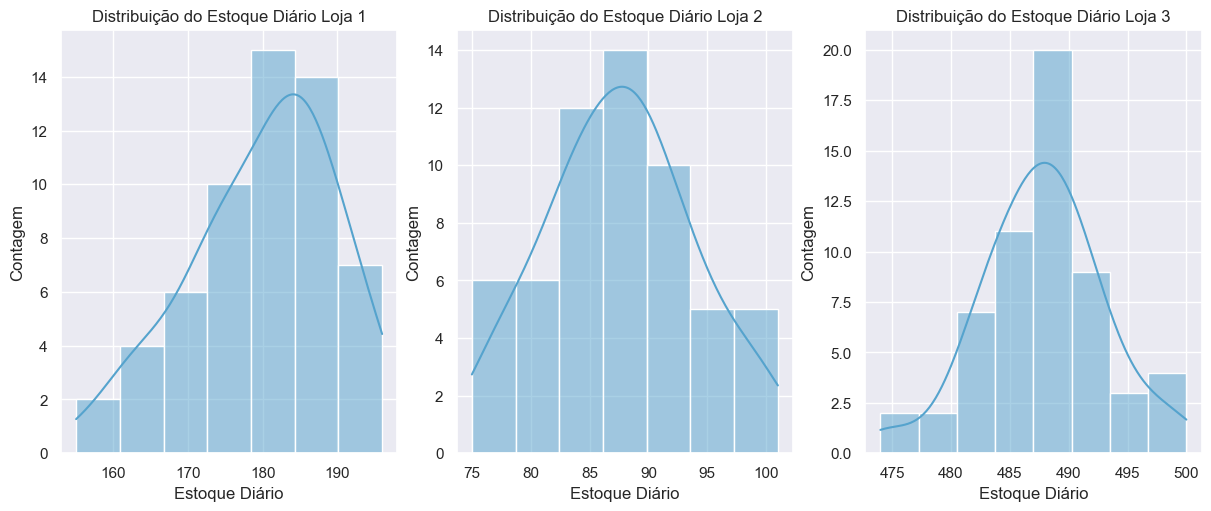

In [19]:
#setando as paletas de cores
sns.set_palette("icefire")

n_lojas = df.id_loja.nunique()
fig, ax = plt.subplots(nrows=1, ncols=n_lojas, figsize=(12, 5), constrained_layout=True)

# Garantir que ax seja uma lista mesmo com um subplot
if n_lojas == 1:
    ax = [ax]

i = 0

for loja in df.id_loja.unique():
    # Estilo do Seaborn
    sns.set(style="darkgrid")
    
     # Histograma com kde ativado
    sns.histplot(df[df.id_loja == loja]["estoque"], ax=ax[i], kde=True, edgecolor=None)
    
    #Títulos e rótulos
    ax[i].set_title(f'Distribuição do Estoque Diário Loja {loja}')
    ax[i].set_xlabel('Estoque Diário')
    ax[i].set_ylabel('Contagem')
    
    #Incrementar o índice
    i = i +1

plt.show()

Podemos ver que todos os esotuqes das lojas apresentam uma distribuição em formato de sino, que se assemelha muito visualmente a distribuição normal. A loja 1 porém apresenta uma assimetria na distribuição do estoque para a esquerda.

Alternativamente, poderíamos abalisar em um único gráfico.

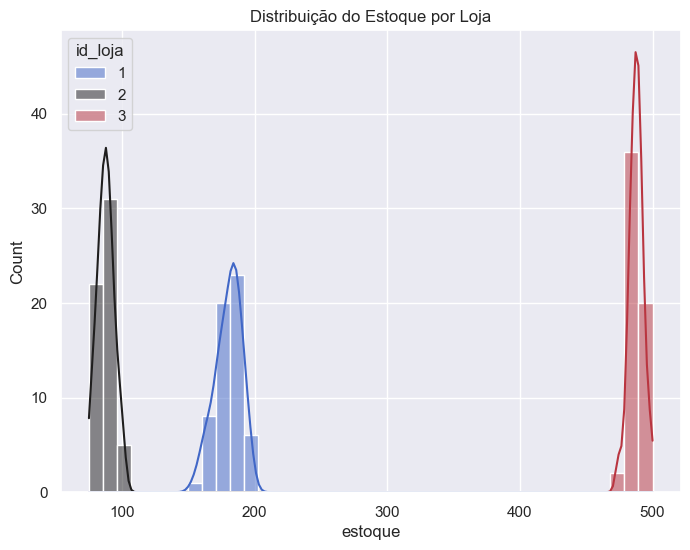

In [21]:
# Estilo do Seaborn
sns.set(style="darkgrid")

# Tamanho da figura
plt.figure(figsize=(8, 6))

# Plot do histograma
sns.histplot(data=df, x="estoque", hue="id_loja", bins=40, kde=True, palette=sns.color_palette("icefire", n_colors=3))

# Título do gráfico
plt.title(label="Distribuição do Estoque por Loja")

# Mostrar o gráfico
plt.show()

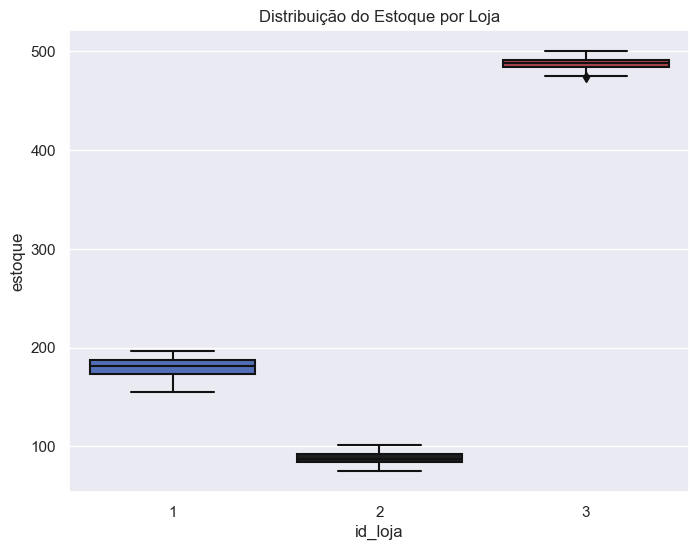

In [22]:
#Plotar um BoxPlot
# Estilo do Seaborn
sns.set(style="darkgrid")

# Tamanho da figura
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(data=df, x="id_loja", y="estoque", palette=sns.color_palette("icefire", n_colors=3))

# Título do gráfico
plt.title("Distribuição do Estoque por Loja")

# Mostrar o gráfico
plt.show()

Podemos perceber que o estoque da loja 3 é bem maior do que o das outras lojas e não existe overlap de estoques entre as tais lojas. o que pode ser um indicativo de que:

 1- as lojas apresentam comportamento de consumo bem diferente, podendo estar localizadas em regiões ou pontos de vendas diferentes;
 2- a loja 3 supostamente deve ser a que mais vende, necessitando assim de um maior estoque;
 
 
 Para calcular a amostra encessária para compararmos a média do estoque de duas lojas, vamos precisar da formula de margem de erro para médias em que o desvio padrão é desconhecido, vamos verificar antes que o tamanho da amostra que temos para decidir qual a formula utilizar

In [23]:
df[["id_loja", "estoque"]].groupby("id_loja").count()

,estoque
id_loja,
1,58
2,58
3,58


Como temos 58 informações de estoque de cada uma das lojas, podemos utilizar a aproximação de sigma = amplitude/4 ou sigma ou assumir que o sigma é igual ao desvio padrão amostral

E seus respectivos inputs:
- sigma: estimado a partir da amplitude, portanto necessitaremos dos valores max, min do estoque de cada loja para dividir essa diferença;
- N é o que queremos descobrir;
- z(a/2) é o valor da estatistica Z para o nível de significância A assumindo que a distribuição é bicaldal.

Vamos primeira obter os inputs da fórmula para depois substituirmos os valores

- ME = MARGEM DE ERRO

PRIMEIRA LOJA

In [27]:
from scipy.stats import norm  # Importando norm 

# Calculando sigma_linha
sigma_linha = (df[df.id_loja == 1]["estoque"].max() - df[df.id_loja == 1]["estoque"].min()) / 4

# Valor de z(a/2) para a = 5%
a = 0.05
z = norm.ppf(1 - a / 2)

# Margem de erro e tamanho da amostra para me = 2%
me = 0.02
n = round((z * sigma_linha / me) ** 2)
print("O tamanho da amostra será de " + str(n) + " para margem de erro de 2% e 5% de significância.")

# Margem de erro e tamanho da amostra para me = 10%
me = 0.1
n = round((z * sigma_linha / me) ** 2)
print("O tamanho da amostra será de " + str(n) + " para margem de erro de 10% e 5% de significância.")

O tamanho da amostra será de 1008983 para margem de erro de 2% e 5% de significância.
O tamanho da amostra será de 40359 para margem de erro de 10% e 5% de significância.


TODAS AS LOJAS

In [30]:
from scipy.stats import norm  # Importando norm corretamente

# Valor de z(a/2) para a = 5%
a = 0.05
z = norm.ppf(1 - a / 2)

# Iterar por todas as lojas
lojas = df.id_loja.unique()
margem_erro_2 = []
margem_erro_10 = []

for loja in lojas:
    # Calculando sigma_linha para cada loja
    estoque_loja = df[df.id_loja == loja]["estoque"]
    sigma_linha = (estoque_loja.max() - estoque_loja.min()) / 4
    
    # Margem de erro e tamanho da amostra para me = 2%
    me = 0.02
    n_2 = round((z * sigma_linha / me) ** 2)
    margem_erro_2.append(n_2)
    
    # Margem de erro e tamanho da amostra para me = 10%
    me = 0.1
    n_10 = round((z * sigma_linha / me) ** 2)
    margem_erro_10.append(n_10)
    
    print(f"Loja {loja}: O tamanho da amostra será de {n_2} para margem de erro de 2% e 5% de significância.")
    print(f"Loja {loja}: O tamanho da amostra será de {n_10} para margem de erro de 10% e 5% de significância.\n")

Loja 1: O tamanho da amostra será de 1008983 para margem de erro de 2% e 5% de significância.
Loja 1: O tamanho da amostra será de 40359 para margem de erro de 10% e 5% de significância.

Loja 2: O tamanho da amostra será de 405754 para margem de erro de 2% e 5% de significância.
Loja 2: O tamanho da amostra será de 16230 para margem de erro de 10% e 5% de significância.

Loja 3: O tamanho da amostra será de 405754 para margem de erro de 2% e 5% de significância.
Loja 3: O tamanho da amostra será de 16230 para margem de erro de 10% e 5% de significância.



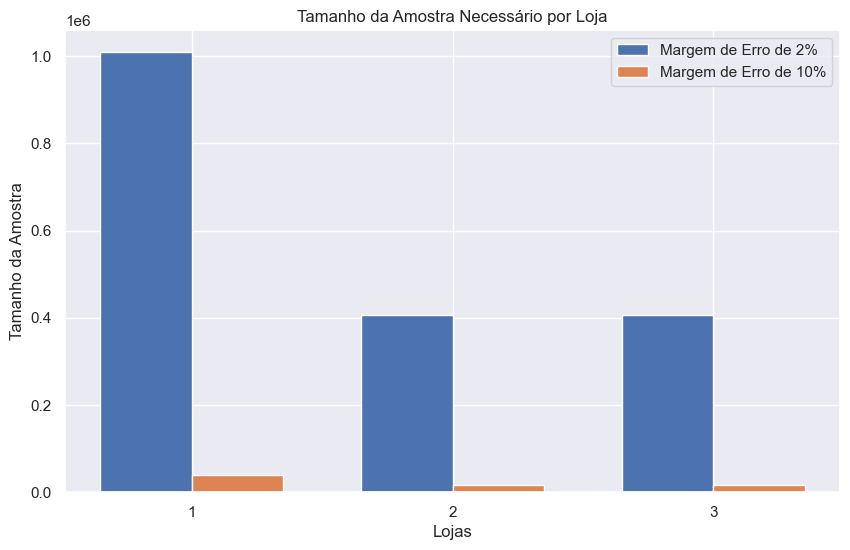

In [31]:
#Plotar um gráfico para mostrar margem de erro

# Criando gráfico
x = np.arange(len(lojas))  # Localização das barras

fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para margem de erro de 2% e 10%
bar_width = 0.35  # Largura das barras
bar1 = ax.bar(x - bar_width/2, margem_erro_2, bar_width, label='Margem de Erro de 2%')
bar2 = ax.bar(x + bar_width/2, margem_erro_10, bar_width, label='Margem de Erro de 10%')

# Adicionando labels e título
ax.set_xlabel('Lojas')
ax.set_ylabel('Tamanho da Amostra')
ax.set_title('Tamanho da Amostra Necessário por Loja')
ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.legend()

plt.show()

Utilizando a estimação de sigma com a segunda opção (assumindo que o desvio padrão amostral = populacional)

In [35]:
from scipy.stats import norm

# Valor de z(a/2) para a = 5%
a = 0.05
z = norm.ppf(1 - a / 2)

for loja in df['id_loja'].unique():
    sigma_linha = df[df['id_loja'] == loja]['estoque'].std()
    
    # Margem de erro de 2%
    me = 0.02
    n_2 = round((z * sigma_linha / me) ** 2)
    print(f"Loja {loja}: O tamanho da amostra será de {n_2} para margem de erro de 2% e 5% de significância.")
    
    # Margem de erro de 10%
    me = 0.1
    n_10 = round((z * sigma_linha / me) ** 2)
    print(f"Loja {loja}: O tamanho da amostra será de {n_10} para margem de erro de 10% e 5% de significância.")

Loja 1: O tamanho da amostra será de 901720 para margem de erro de 2% e 5% de significância.
Loja 1: O tamanho da amostra será de 36069 para margem de erro de 10% e 5% de significância.
Loja 2: O tamanho da amostra será de 372727 para margem de erro de 2% e 5% de significância.
Loja 2: O tamanho da amostra será de 14909 para margem de erro de 10% e 5% de significância.
Loja 3: O tamanho da amostra será de 262015 para margem de erro de 2% e 5% de significância.
Loja 3: O tamanho da amostra será de 10481 para margem de erro de 10% e 5% de significância.
